In [1]:
from imports import *

/Users/jniedziela/.pyenv/versions/3.11.4/envs/master/lib/python3.11/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [2]:
df1 = pd.read_excel(EXCEL_DATA_DIR + 'Techniek_aanval_met_sprong_Ref_POSE_tabel.xlsx', index_col=0)
df1.rename(columns=MAPPINGS, inplace=True)
df2 = pd.read_excel(EXCEL_DATA_DIR + 'GX010044_Clip_6_POSE_tabel.xlsx', index_col=0)
df2.rename(columns=MAPPINGS, inplace=True)

df1['mid_hip_x'] = (df1['left_hip_x'] + df1['right_hip_x']) / 2
df1['mid_hip_y'] = (df1['left_hip_y'] + df1['right_hip_y']) / 2
df1['mid_shoulder_x'] = (df1['left_shoulder_x'] + df1['right_shoulder_x']) / 2
df1['mid_shoulder_y'] = (df1['left_shoulder_y'] + df1['right_shoulder_y']) / 2

df1.drop(columns=[
                # 'nose_x', 'nose_y', 
                'ball_position_x', 'ball_position_y',
                'right_eye_x', 'right_eye_y', 'left_eye_x', 'left_eye_y',
                'right_ear_x', 'right_ear_y', 'left_ear_x', 'left_ear_y'], inplace=True)

df2['mid_hip_x'] = (df2['left_hip_x'] + df2['right_hip_x']) / 2
df2['mid_hip_y'] = (df2['left_hip_y'] + df2['right_hip_y']) / 2
df2['mid_shoulder_x'] = (df2['left_shoulder_x'] + df2['right_shoulder_x']) / 2
df2['mid_shoulder_y'] = (df2['left_shoulder_y'] + df2['right_shoulder_y']) / 2

df2.drop(columns=[
                # 'nose_x', 'nose_y', 
                'ball_position_x', 'ball_position_y',
                'right_eye_x', 'right_eye_y', 'left_eye_x', 'left_eye_y',
                'right_ear_x', 'right_ear_y', 'left_ear_x', 'left_ear_y'], inplace=True)


df1.head()
df2.head()

,video_path,frame_number,person_id,nose_x,nose_y,nose_p,left_eye_p,right_eye_p,left_ear_p,right_ear_p,...,handedness,runup,jump_angle,position_to_ball,hit_arm_angle,fps,mid_hip_x,mid_hip_y,mid_shoulder_x,mid_shoulder_y
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,/content/drive/MyDrive/POSE_VOLLEYBAL/OUTPUT/G...,0,1,1041,1141,0.957478,0.477825,0.977520,0.059937,0.982728,...,NaN,Rechterpas,NaN,NaN,NaN,59,943.0,1414.5,972.5,1215.5
1,/content/drive/MyDrive/POSE_VOLLEYBAL/OUTPUT/G...,1,1,1041,1141,0.957289,0.478524,0.977358,0.060126,0.982461,...,NaN,NaN,NaN,NaN,NaN,59,943.0,1414.5,972.5,1215.5
2,/content/drive/MyDrive/POSE_VOLLEYBAL/OUTPUT/G...,2,1,1047,1142,0.949421,0.465829,0.971985,0.066479,0.978214,...,NaN,NaN,NaN,NaN,NaN,59,943.5,1413.0,978.0,1214.5
3,/content/drive/MyDrive/POSE_VOLLEYBAL/OUTPUT/G...,3,1,1051,1143,0.944460,0.463315,0.968601,0.072946,0.975411,...,NaN,NaN,NaN,NaN,NaN,59,943.5,1413.5,982.0,1215.0
4,/content/drive/MyDrive/POSE_VOLLEYBAL/OUTPUT/G...,4,1,1056,1148,0.955632,0.485472,0.976440,0.065830,0.982430,...,NaN,NaN,NaN,NaN,NaN,59,943.5,1415.5,987.5,1217.5


In [3]:
# for joint in joints:
#     df1[f'{joint}_x_normalized'], df1[f'{joint}_y_normalized'] = normalize_joint_coordinates(df1, f'{joint}_x', f'{joint}_y')
df1 = bbox_normalize_joint_coordinates(df1)

In [4]:
# for joint in joints:
#     df2[f'{joint}_x_normalized'], df2[f'{joint}_y_normalized'] = normalize_joint_coordinates(df2, f'{joint}_x', f'{joint}_y')
df2 = bbox_normalize_joint_coordinates(df2)

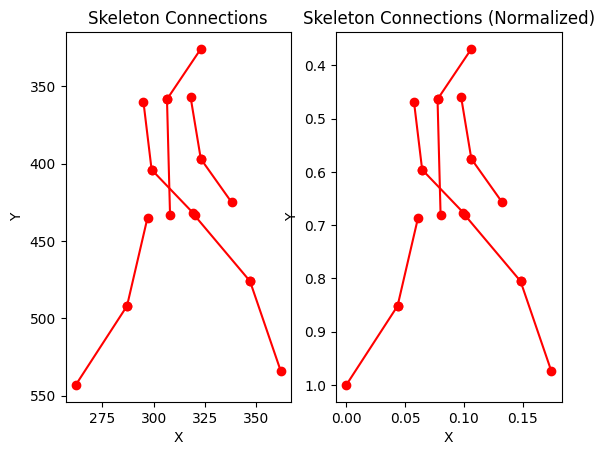

In [5]:
plot_frame(df1, 0)

/Users/jniedziela/Developer/master/time_series_comp/imports.py:172: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  out = ax.plot([start_x, end_x], [start_y, end_y], 'ro-', color=color)


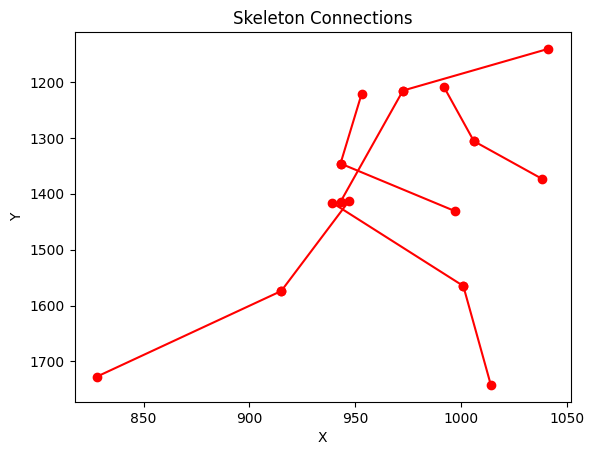

In [6]:
plot_sequence(df2, 0)

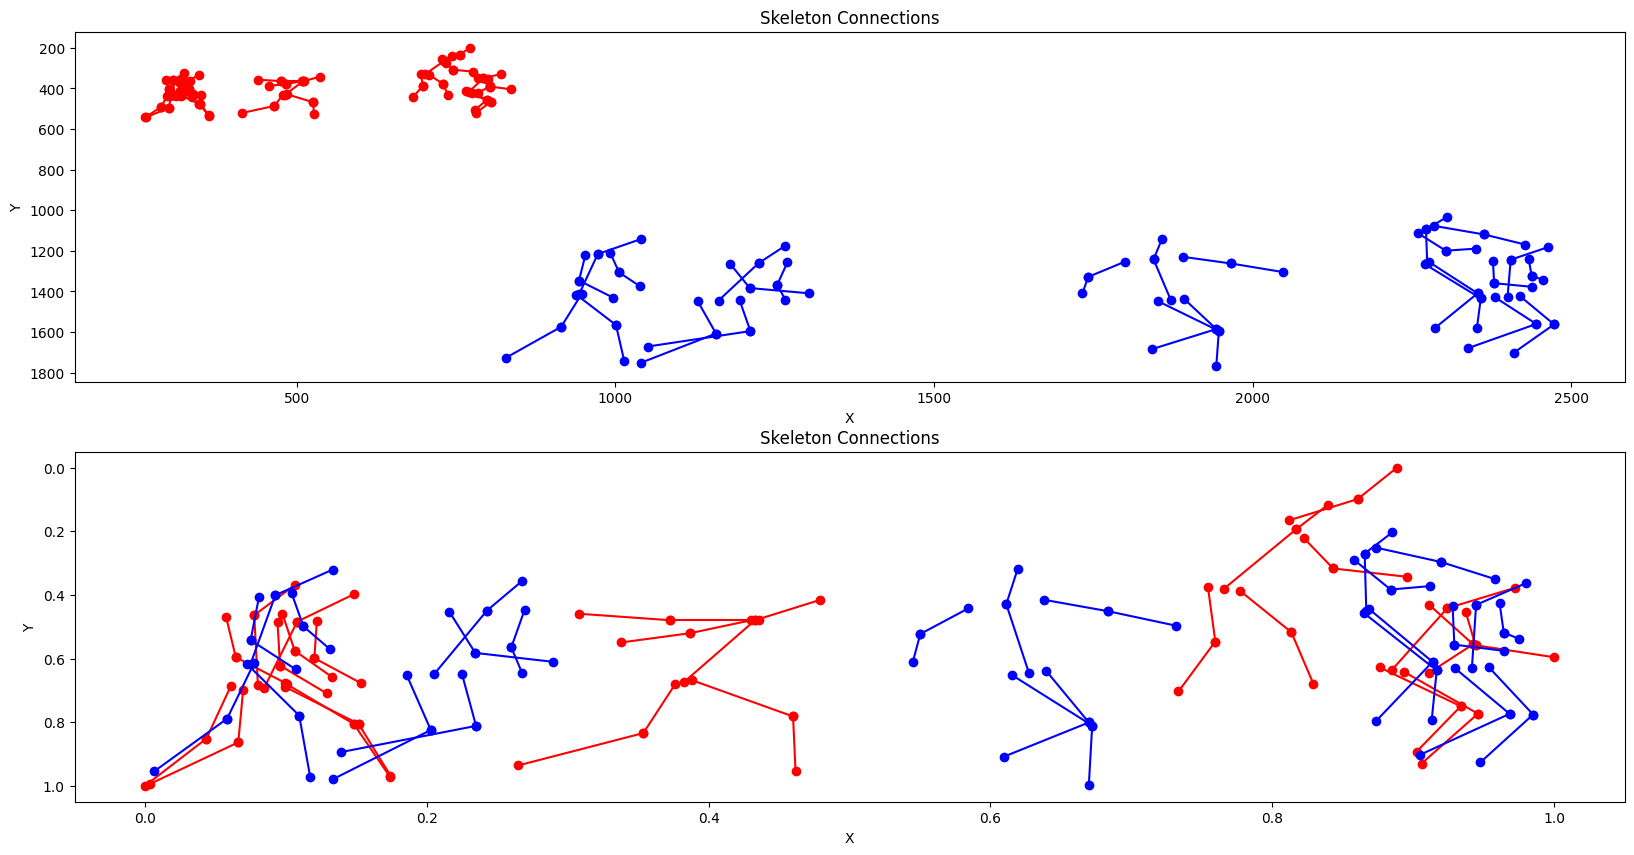

In [7]:
fig, ax = plt.subplots(2, 1, figsize=(20, 10))
ax[0].invert_yaxis()
ax[1].invert_yaxis()
for i in range(0, len(df1), 20):
    plot_sequence(df1, i, ax=ax[0])
    plot_sequence(df1, i, normalised=True, ax=ax[1])

for i in range(0, len(df2), 40):
    plot_sequence(df2, i, ax=ax[0], color='b')
    plot_sequence(df2, i, normalised=True, ax=ax[1], color='b')